## Content
1. Importing Data
2. Exploratory data analysis
3. Data preprocessing for modeling
4.	Model selection by KFold Cross validation
5.	Gradient Boosting
    1. Hyperparameter Tuning
    2. Variable selection by Feature importances 
    3. Gradient Boosting final model
    4. Model evaluation metrics
6.	Logistic Regression(2nd best model)
    1. Finding optimum cutoff point
    2. Comparison b/w cutoff values
    3. Model evaluation metrics

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Changing working directory
os.getcwd()
os.chdir('C:\\Users\\Omkar\\Desktop\\D3 Task')

In [3]:
#Importing Data
#Change the path
DataOR=pd.read_excel('Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent.xlsx', sheet_name='Dataset')
DataOR.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


## Exploratory data analysis

Persistency_Flag           
Persistency_Flag    Non-Persistent Persistent
Gender Age_Bucket                            
Female 55-65                   458        252
       65-75                   623        415
       <55                      95         53
       >75                     842        492
Male   55-65                    14          9
       65-75                    30         18
       <55                       8         10
       >75                      65         40

<Figure size 360x1080 with 0 Axes>

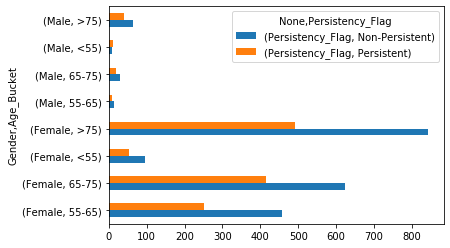

In [4]:
PT1=pd.pivot_table(DataOR, columns='Persistency_Flag',
                index=['Gender','Age_Bucket'], aggfunc={'Persistency_Flag':'count'})
plt.figure(figsize=(5,15))
PT1.plot.barh()
PT1

In both 'Gender', Non-persistent patients are more in all Age groups when compared witn Persistent and Non-persistent patients.

In both 'Gender', more no. of  persistent patients are above 75 age group.

Persistency_Flag           
Persistency_Flag   Non-Persistent Persistent
Region                                      
Midwest                       934        449
Northeast                     134         98
Other/Unknown                  35         25
South                         753        494
West                          279        223

<Figure size 360x1080 with 0 Axes>

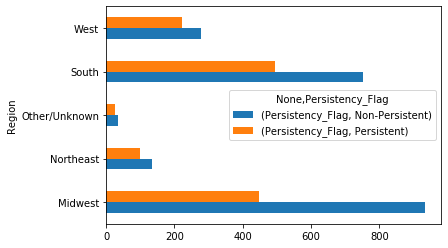

In [5]:
PT2=pd.pivot_table(DataOR, columns='Persistency_Flag',
                index=['Region'], aggfunc={'Persistency_Flag':'count'})
plt.figure(figsize=(5,15))
PT2.plot.barh()
PT2

In South region more no. of patients are persistent than Midwest region.

Persistency_Flag           
Persistency_Flag          Non-Persistent Persistent
Tscore_Bucket_Prior_Ntm                            
<=-2.5                               934        539
>-2.5                               1201        750

<Figure size 360x1080 with 0 Axes>

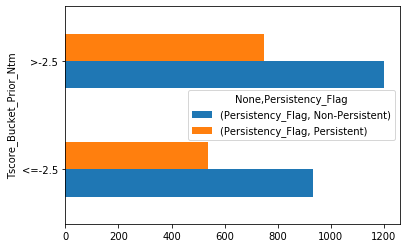

In [6]:
PT3=pd.pivot_table(DataOR, columns='Persistency_Flag',
                index=['Tscore_Bucket_Prior_Ntm'], aggfunc={'Persistency_Flag':'count'})
plt.figure(figsize=(5,15))
PT3.plot.barh()
PT3

More no. of patients are persistent, whose T Score >-2.5 years at time of the NTM Rx. 

Persistency_Flag           
Persistency_Flag   Non-Persistent Persistent
Change_T_Score                              
Improved                       28         66
No change                     959        701
Unknown                      1082        415
Worsened                       66        107

<Figure size 360x1080 with 0 Axes>

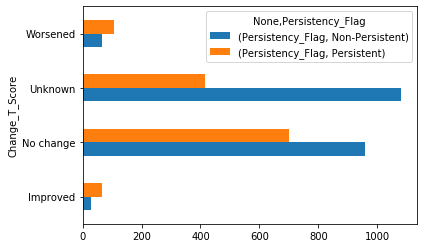

In [7]:
PT4=pd.pivot_table(DataOR, columns='Persistency_Flag',
                index=['Change_T_Score'], aggfunc={'Persistency_Flag':'count'})
plt.figure(figsize=(5,15))
PT4.plot.barh()
PT4

More no. of patients are persistent, who are not changed in Tscore before starting with any therapy and after receiving therapy.

Persistency_Flag           
Persistency_Flag      Non-Persistent Persistent
Change_Risk_Segment                            
Improved                           9         13
No change                        621        431
Unknown                         1457        772
Worsened                          48         73

<Figure size 360x1080 with 0 Axes>

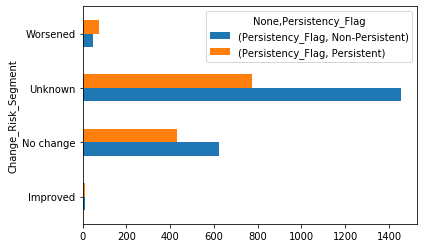

In [8]:
PT5=pd.pivot_table(DataOR, columns='Persistency_Flag',
                index=['Change_Risk_Segment'], aggfunc={'Persistency_Flag':'count'})
plt.figure(figsize=(5,15))
PT5.plot.barh()
PT5

More no. of patients are persistent, who have unknown change in Risk Segment before starting with any therapy and after receiving therapy.

Persistency_Flag           
Persistency_Flag   Non-Persistent Persistent
Adherent_Flag                               
Adherent                     2068       1183
Non-Adherent                   67        106

<Figure size 360x1080 with 0 Axes>

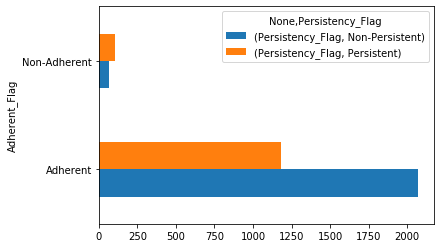

In [9]:
PT6=pd.pivot_table(DataOR, columns='Persistency_Flag',
                index=['Adherent_Flag'], aggfunc={'Persistency_Flag':'count'})
plt.figure(figsize=(5,15))
PT6.plot.barh()
PT6

More no. of patients are persistent, who are taking adherence for therapies.

In [10]:
#EDA and Statistical report of Data
#!pip install pandas-profiling #Have to import this library
Data=DataOR.copy()
import pandas_profiling
Data.profile_report()

1. There is no missing values in data
2. Remove 'Ntm_Speciality' variable as this variable is highly correlated with 'Ntm_Specialist_Flag' and 'Ntm_Speciality_Bucket'

In [11]:
#Removing 'Ntm_Speciality' from Data
Data.drop(['Ntm_Speciality'],1,inplace=True)

## Data preprocessing for modeling

In [12]:
#Converting Y/N to 1/0
Data['Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'] = Data['Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'].map({'Y': 1, 'N': 0})
Data['Comorb_Dorsalgia'] = Data['Comorb_Dorsalgia'].map({'Y': 1, 'N': 0})
Data['Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx'] = Data['Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx'].map({'Y': 1, 'N': 0})
Data['Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'] = Data['Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'].map({'Y': 1, 'N': 0})
Data['Comorb_Encounter_For_Immunization'] = Data['Comorb_Encounter_For_Immunization'].map({'Y': 1, 'N': 0})
Data['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'] = Data['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'].map({'Y': 1, 'N': 0})
Data['Comorb_Gastro_esophageal_reflux_disease'] = Data['Comorb_Gastro_esophageal_reflux_disease'].map({'Y': 1, 'N': 0})
Data['Comorb_Long_Term_Current_Drug_Therapy'] = Data['Comorb_Long_Term_Current_Drug_Therapy'].map({'Y': 1, 'N': 0})
Data['Comorb_Osteoporosis_without_current_pathological_fracture'] = Data['Comorb_Osteoporosis_without_current_pathological_fracture'].map({'Y': 1, 'N': 0})
Data['Comorb_Other_Disorders_Of_Bone_Density_And_Structure'] = Data['Comorb_Other_Disorders_Of_Bone_Density_And_Structure'].map({'Y': 1, 'N': 0})
Data['Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'] = Data['Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'].map({'Y': 1, 'N': 0})
Data['Comorb_Personal_history_of_malignant_neoplasm'] = Data['Comorb_Personal_history_of_malignant_neoplasm'].map({'Y': 1, 'N': 0})
Data['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'] = Data['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'].map({'Y': 1, 'N': 0})
Data['Comorb_Vitamin_D_Deficiency'] = Data['Comorb_Vitamin_D_Deficiency'].map({'Y': 1, 'N': 0})
Data['Concom_Anaesthetics_General'] = Data['Concom_Anaesthetics_General'].map({'Y': 1, 'N': 0})
Data['Concom_Anti_Depressants_And_Mood_Stabilisers'] = Data['Concom_Anti_Depressants_And_Mood_Stabilisers'].map({'Y': 1, 'N': 0})
Data['Concom_Broad_Spectrum_Penicillins'] = Data['Concom_Broad_Spectrum_Penicillins'].map({'Y': 1, 'N': 0})
Data['Concom_Cephalosporins'] = Data['Concom_Cephalosporins'].map({'Y': 1, 'N': 0})
Data['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'] = Data['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'].map({'Y': 1, 'N': 0})
Data['Concom_Fluoroquinolones'] = Data['Concom_Fluoroquinolones'].map({'Y': 1, 'N': 0})
Data['Concom_Macrolides_And_Similar_Types'] = Data['Concom_Macrolides_And_Similar_Types'].map({'Y': 1, 'N': 0})
Data['Concom_Narcotics'] = Data['Concom_Narcotics'].map({'Y': 1, 'N': 0})
Data['Concom_Systemic_Corticosteroids_Plain'] = Data['Concom_Systemic_Corticosteroids_Plain'].map({'Y': 1, 'N': 0})
Data['Concom_Viral_Vaccines'] = Data['Concom_Viral_Vaccines'].map({'Y': 1, 'N': 0})
Data['Dexa_During_Rx'] = Data['Dexa_During_Rx'].map({'Y': 1, 'N': 0})
Data['Frag_Frac_During_Rx'] = Data['Frag_Frac_During_Rx'].map({'Y': 1, 'N': 0})
Data['Frag_Frac_Prior_Ntm'] = Data['Frag_Frac_Prior_Ntm'].map({'Y': 1, 'N': 0})
Data['Gluco_Record_During_Rx'] = Data['Gluco_Record_During_Rx'].map({'Y': 1, 'N': 0})
Data['Gluco_Record_Prior_Ntm'] = Data['Gluco_Record_Prior_Ntm'].map({'Y': 1, 'N': 0})
Data['Idn_Indicator'] = Data['Idn_Indicator'].map({'Y': 1, 'N': 0})
Data['Injectable_Experience_During_Rx'] = Data['Injectable_Experience_During_Rx'].map({'Y': 1, 'N': 0})
Data['Risk_Chronic_Liver_Disease'] = Data['Risk_Chronic_Liver_Disease'].map({'Y': 1, 'N': 0})
Data['Risk_Chronic_Malnutrition_Or_Malabsorption'] = Data['Risk_Chronic_Malnutrition_Or_Malabsorption'].map({'Y': 1, 'N': 0})
Data['Risk_Estrogen_Deficiency'] = Data['Risk_Estrogen_Deficiency'].map({'Y': 1, 'N': 0})
Data['Risk_Excessive_Thinness'] = Data['Risk_Excessive_Thinness'].map({'Y': 1, 'N': 0})
Data['Risk_Family_History_Of_Osteoporosis'] = Data['Risk_Family_History_Of_Osteoporosis'].map({'Y': 1, 'N': 0})
Data['Risk_Hysterectomy_Oophorectomy'] = Data['Risk_Hysterectomy_Oophorectomy'].map({'Y': 1, 'N': 0})
Data['Risk_Immobilization'] = Data['Risk_Immobilization'].map({'Y': 1, 'N': 0})
Data['Risk_Low_Calcium_Intake'] = Data['Risk_Low_Calcium_Intake'].map({'Y': 1, 'N': 0})
Data['Risk_Osteogenesis_Imperfecta'] = Data['Risk_Osteogenesis_Imperfecta'].map({'Y': 1, 'N': 0})
Data['Risk_Patient_Parent_Fractured_Their_Hip'] = Data['Risk_Patient_Parent_Fractured_Their_Hip'].map({'Y': 1, 'N': 0})
Data['Risk_Poor_Health_Frailty'] = Data['Risk_Poor_Health_Frailty'].map({'Y': 1, 'N': 0})
Data['Risk_Recurring_Falls'] = Data['Risk_Recurring_Falls'].map({'Y': 1, 'N': 0})
Data['Risk_Rheumatoid_Arthritis'] = Data['Risk_Rheumatoid_Arthritis'].map({'Y': 1, 'N': 0})
Data['Risk_Smoking_Tobacco'] = Data['Risk_Smoking_Tobacco'].map({'Y': 1, 'N': 0})
Data['Risk_Type_1_Insulin_Dependent_Diabetes'] = Data['Risk_Type_1_Insulin_Dependent_Diabetes'].map({'Y': 1, 'N': 0})
Data['Risk_Untreated_Chronic_Hyperthyroidism'] = Data['Risk_Untreated_Chronic_Hyperthyroidism'].map({'Y': 1, 'N': 0})
Data['Risk_Untreated_Chronic_Hypogonadism'] = Data['Risk_Untreated_Chronic_Hypogonadism'].map({'Y': 1, 'N': 0})
Data['Risk_Untreated_Early_Menopause'] = Data['Risk_Untreated_Early_Menopause'].map({'Y': 1, 'N': 0})
Data['Risk_Vitamin_D_Insufficiency'] = Data['Risk_Vitamin_D_Insufficiency'].map({'Y': 1, 'N': 0})

In [13]:
#Converting categorical variable to numerical
Data['Persistency_Flag'] = Data['Persistency_Flag'].map({'Persistent': 1, 'Non-Persistent': 0})
Data['Gender'] = Data['Gender'].map({'Male': 1, 'Female': 0})
Data['Ntm_Specialist_Flag'] = Data['Ntm_Specialist_Flag'].map({'Specialist': 1, 'Others': 0})
Data['Risk_Segment_Prior_Ntm'] = Data['Risk_Segment_Prior_Ntm'].map({'VLR_LR': 1, 'HR_VHR': 0})
Data['Tscore_Bucket_Prior_Ntm'] = Data['Tscore_Bucket_Prior_Ntm'].map({'>-2.5': 1, '<=-2.5': 0})
Data['Adherent_Flag'] = Data['Adherent_Flag'].map({'Adherent': 1, 'Non-Adherent': 0})

In [14]:
#Creating (n-1) dummy variables for more than two categorical variables to avoid dummy trap. 
Race=pd.get_dummies(Data['Race'],prefix='Race')
Race.drop(['Race_Other/Unknown'],1,inplace=True)
Data = pd.concat([Data,Race],axis=1)

Ethnicity=pd.get_dummies(Data['Ethnicity'],prefix='Ethnicity')
Ethnicity.drop(['Ethnicity_Unknown'],1,inplace=True)
Data = pd.concat([Data,Ethnicity],axis=1)

Region=pd.get_dummies(Data['Region'],prefix='Region')
Region.drop(['Region_Other/Unknown'],1,inplace=True)
Data = pd.concat([Data,Region],axis=1)

Age=pd.get_dummies(Data['Age_Bucket'],prefix='Age_Bucket')
Age.drop(['Age_Bucket_<55'],1,inplace=True)
Data = pd.concat([Data,Age],axis=1)

Ntm_SpeciBu=pd.get_dummies(Data['Ntm_Speciality_Bucket'],prefix='Ntm_Speciality_Bucket')
Ntm_SpeciBu.drop(['Ntm_Speciality_Bucket_Rheum'],1,inplace=True)
Data = pd.concat([Data,Ntm_SpeciBu],axis=1)

Risk_Segme=pd.get_dummies(Data['Risk_Segment_During_Rx'],prefix='Risk_Segment_During_Rx')
Risk_Segme.drop(['Risk_Segment_During_Rx_Unknown'],1,inplace=True)
Data = pd.concat([Data,Risk_Segme],axis=1)

Tscore_Buck=pd.get_dummies(Data['Tscore_Bucket_During_Rx'],prefix='Tscore_Bucket_During_Rx')
Tscore_Buck.drop(['Tscore_Bucket_During_Rx_Unknown'],1,inplace=True)
Data = pd.concat([Data,Tscore_Buck],axis=1)

Change_T_Score=pd.get_dummies(Data['Change_T_Score'],prefix='Change_T_Score')
Change_T_Score.drop(['Change_T_Score_Unknown'],1,inplace=True)
Data = pd.concat([Data,Change_T_Score],axis=1)

Change_Risk=pd.get_dummies(Data['Change_Risk_Segment'],prefix='Change_Risk_Segment')
Change_Risk.drop(['Change_Risk_Segment_Unknown'],1,inplace=True)
Data = pd.concat([Data,Change_Risk],axis=1)

In [15]:
#Removing the original variables for Data
Data.drop(['Race','Ethnicity','Region','Age_Bucket','Ntm_Speciality_Bucket','Risk_Segment_During_Rx',
          'Tscore_Bucket_During_Rx','Change_T_Score','Change_Risk_Segment'],1,inplace=True)

In [16]:
#Separating x and y, creating Train and Test Data sets
x=Data.drop(['Ptid','Persistency_Flag'],1)
y=Data['Persistency_Flag']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

## Model selection by KFold Cross validation

In [66]:
#Fitting model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#x2 is only for XGBoost
x2=x.copy()
x2.columns=x2.columns.astype(str).str.replace("<|>", "_")

LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()
XGB=XGBClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)
LR_KCV = cross_val_score(LR, x, y, cv=folds)
DT_KCV = cross_val_score(DT, x, y, cv=folds)
RF_KCV = cross_val_score(RF, x, y, cv=folds)
AB_KCV = cross_val_score(AB, x, y, cv=folds)
GB_KCV = cross_val_score(GB, x, y, cv=folds)
XGB_KCV = cross_val_score(XGB, x2, y, cv=folds)

Text(0, 0.5, 'Accuracy score')

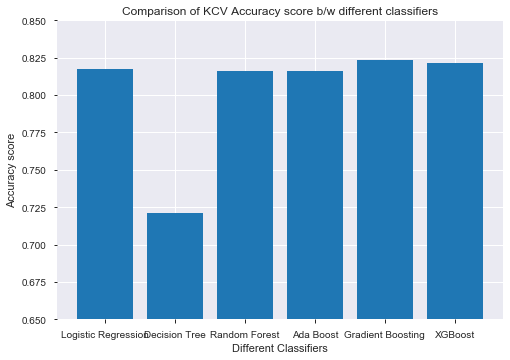

In [67]:
#Comparing KCV Accuracy score b/w different models
method=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost']
KCV_score=[LR_KCV.mean(), DT_KCV.mean(), RF_KCV.mean(), AB_KCV.mean(), GB_KCV.mean(), XGB_KCV.mean()]

plt.bar(method, KCV_score)
plt.ylim((0.65,0.85))
plt.title('Comparison of KCV Accuracy score b/w different classifiers')
plt.xlabel('Different Classifiers')
plt.ylabel('Accuracy score')

By comparing KCV Accuracy scores of all models "Gradient Boosting" and "Logistics Regression" has more KCV Accuracy scores

## Gradient Boosting
### Hyperparameter Tuning

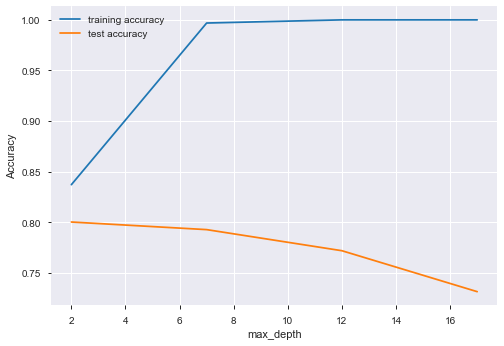

In [20]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
gb1 = GradientBoostingClassifier()

# fit tree on training data
gb1 = GridSearchCV(gb1, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
gb1.fit(x_train, y_train)

scores = gb1.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

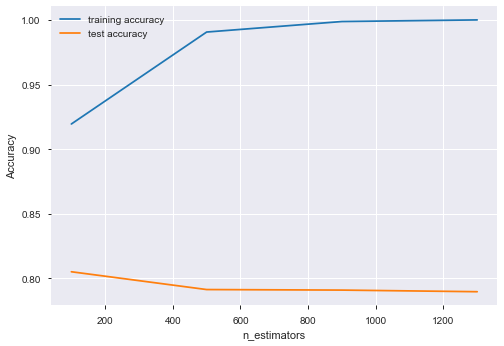

In [21]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
gb1 = GradientBoostingClassifier(max_depth=4)

# fit tree on training data
gb1 = GridSearchCV(gb1, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
gb1.fit(x_train, y_train)

# scores of GridSearch CV
scores = gb1.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

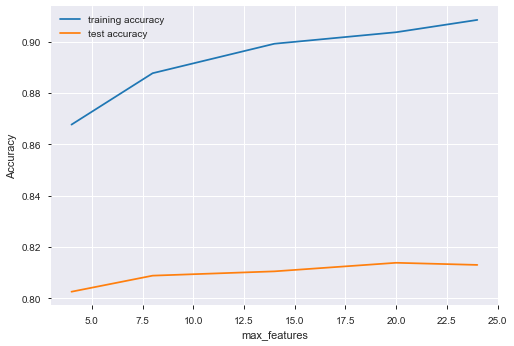

In [22]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
gb1 = GradientBoostingClassifier(max_depth=4)

# fit tree on training data
gb1 = GridSearchCV(gb1, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
gb1.fit(x_train, y_train)

# scores of GridSearch CV
scores = gb1.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

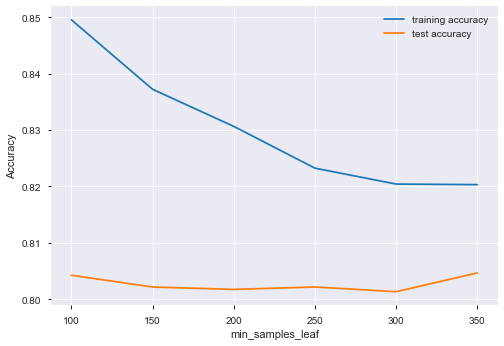

In [23]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
gb1 = GradientBoostingClassifier()

# fit tree on training data
gb1 = GridSearchCV(gb1, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
gb1.fit(x_train, y_train)

# scores of GridSearch CV
scores = gb1.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

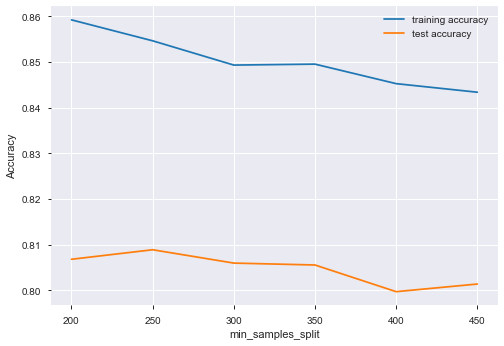

In [24]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
gb1 = GradientBoostingClassifier()

# fit tree on training data
gb1 = GridSearchCV(gb1, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
gb1.fit(x_train, y_train)

# scores of GridSearch CV
scores = gb1.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 10, 2),
    'min_samples_leaf': range(100, 150, 20),
    'min_samples_split': range(100, 250, 50),
    'n_estimators': range(100, 400, 50), 
    'max_features': range(1, 10, 2)
}
# Create a based model
gb1 = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 10.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [26]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8092723464899211 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 150, 'n_estimators': 350}


In [27]:
# model with the best hyperparameters (Enter parameter values from above cell result)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4,
                                 max_features=3,
                                 min_samples_leaf=100, 
                                 min_samples_split=100,                    
                                 n_estimators=150)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Variable selection by Feature importances

<BarContainer object of 18 artists>

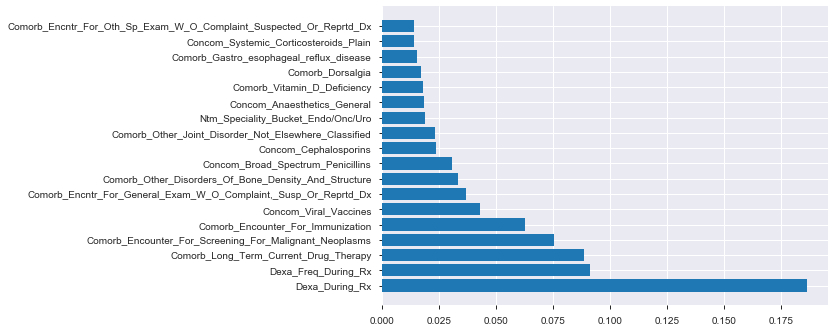

In [28]:
#Selecting Top-18 variables by "Feature_importances"
FI=pd.DataFrame(np.arange(0,81), columns=['Index'])
FI['Variable']=x_train.columns
FI['Feature_importances']=gbc.feature_importances_

FIG=FI.sort_values(by='Feature_importances',ascending=False).head(18)
plt.barh(width=FIG['Feature_importances'], y=FIG['Variable'])

## Gradient Boosting model final model

In [29]:
#Creating x_train and x_test data sets
x_train_FI=x_train.iloc[:,FIG['Index']]
x_test_FI=x_test.iloc[:,FIG['Index']]

#Fitting model
gbc.fit(x_train_FI,y_train)
# predict
y_pred_gbc_FI = gbc.predict(x_test_FI)

## Model evaluation metrics

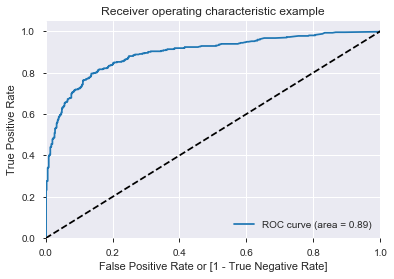

Clasification Table: 
[[565  72]
 [ 93 298]]
Accuracy:  0.84
F1 Score:  0.78
Error rate:  0.16
Sensitivity:  0.76
Specificity:  0.89
Precision:  0.81
False positive rate:  0.11

classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       637
           1       0.81      0.76      0.78       391

    accuracy                           0.84      1028
   macro avg       0.83      0.82      0.83      1028
weighted avg       0.84      0.84      0.84      1028



In [32]:
from sklearn import metrics

y_prob=gbc.predict_proba(x_test_FI)
y_val=pd.DataFrame(y_prob)
#ROC and AUC value
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
draw_roc(y_test, y_val[1])

#Classification Table
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
AT=confusion_matrix(y_test, y_pred_gbc_FI)

acu=metrics.accuracy_score(y_test, y_pred_gbc_FI)
F1=f1_score(y_test, y_pred_gbc_FI)

TN=AT[0,0]
TP=AT[1,1]
FP=AT[0,1]
FN=AT[1,0]
sen=TP/(TP+FN)
spec=TN/(TN+FP)
pre=TP/(TP+FP)
FPR=1-spec
ER=1-acu

print('Clasification Table: ')
print(AT)
print('Accuracy: ', round(acu,2))
print('F1 Score: ', round(F1,2))
print('Error rate: ', round(ER,2))
print('Sensitivity: ', round(sen,2))
print('Specificity: ', round(spec,2))
print('Precision: ', round(pre,2))
print('False positive rate: ', round(FPR,2))

#Classification report
from sklearn.metrics import classification_report,confusion_matrix
print()
print('classification report:')
print(classification_report(y_test,y_pred_gbc_FI))

## Logistic Regression
### Finding optimum cutoff point

In [33]:
LR=LR.fit(x_train_FI,y_train)
y_prob=LR.predict_proba(x_test_FI)
y_val=pd.DataFrame(y_prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.380350  1.000000  0.000000
0.1   0.1  0.578794  0.956522  0.346939
0.2   0.2  0.720817  0.907928  0.605965
0.3   0.3  0.791829  0.861893  0.748823
0.4   0.4  0.814202  0.803069  0.821036
0.5   0.5  0.824903  0.726343  0.885400
0.6   0.6  0.819066  0.659847  0.916797
0.7   0.7  0.817121  0.603581  0.948195
0.8   0.8  0.786965  0.488491  0.970173
0.9   0.9  0.733463  0.306905  0.995290


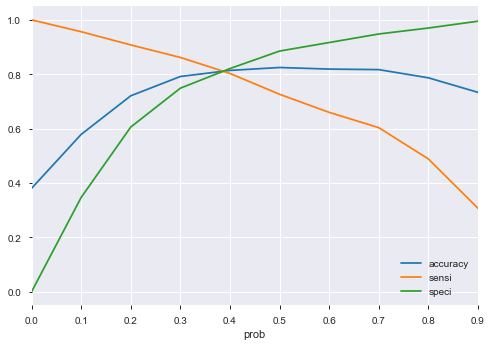

In [34]:
#predicting y for 0.0 to 0.9 cutoff points
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_val[i]=y_val[1].map(lambda x: 1 if x>i else 0)
y_val.head()

#calculating cutoff point
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

from sklearn import metrics
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_test, y_val[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

1. At cutoff point 0.5: Accuracy and Specificity is high but Sensitivity is low. 
2. At cutoff point 0.39: Sensitivity, Specificity and Accuracy is constant, so I have considered approximetly 0.39 as Optimum cutoff point.

In [35]:
#predicting y values with 0.5 cutoff
y_pred_LR=LR.predict(x_test_FI)
Acc_LR=accuracy_score(y_test, y_pred_LR)
F1_LR=f1_score(y_test, y_pred_LR)

#predicting y values with 0.39 cutoff
y_cutoff=y_val[1].map(lambda x: 1 if x>0.39 else 0)
Acc_LR2=accuracy_score(y_test, y_cutoff)
F1_LR2=f1_score(y_test, y_cutoff)

### Comparison b/w cutoff values

Text(0, 0.5, 'F1 score')

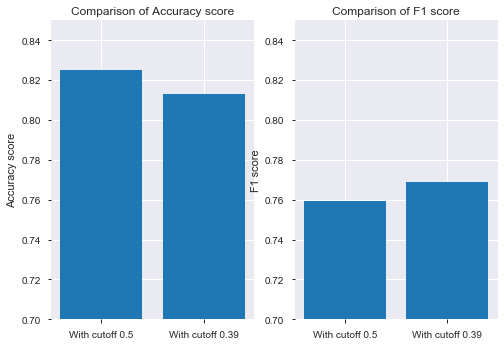

In [36]:
x1=['With cutoff 0.5', 'With cutoff 0.39']
AccLR=[Acc_LR, Acc_LR2]
F1LR=[F1_LR, F1_LR2]
plt.subplot(1, 2, 1)
plt.title('Comparison of Accuracy score')
plt.bar(x1, AccLR)
plt.ylim((0.7,0.85))
plt.ylabel('Accuracy score')
plt.subplot(1, 2, 2)
plt.title('Comparison of F1 score')
plt.bar(x1, F1LR)
plt.ylim((0.7,0.85))
plt.ylabel('F1 score')

## Model evaluation metrics

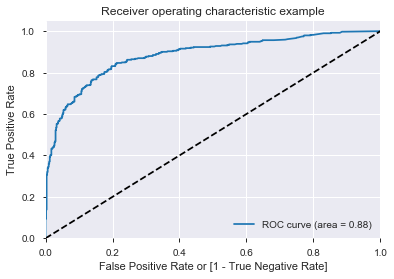

Clasification Table: 
[[517 120]
 [ 72 319]]
Accuracy:  0.81
F1 Score:  0.77
Error rate:  0.19
Sensitivity:  0.82
Specificity:  0.81
Precision:  0.73
False positive rate:  0.19

classification report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       637
           1       0.73      0.82      0.77       391

    accuracy                           0.81      1028
   macro avg       0.80      0.81      0.81      1028
weighted avg       0.82      0.81      0.81      1028



In [37]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
draw_roc(y_test, y_val[1])

#Classification Table
from sklearn.metrics import confusion_matrix
AT=confusion_matrix(y_test, y_cutoff)

acu=metrics.accuracy_score(y_test, y_cutoff)
F1=f1_score(y_test, y_cutoff)

TN=AT[0,0]
TP=AT[1,1]
FP=AT[0,1]
FN=AT[1,0]
sen=TP/(TP+FN)
spec=TN/(TN+FP)
pre=TP/(TP+FP)
FPR=1-spec
ER=1-acu

print('Clasification Table: ')
print(AT)
print('Accuracy: ', round(acu,2))
print('F1 Score: ', round(F1,2))
print('Error rate: ', round(ER,2))
print('Sensitivity: ', round(sen,2))
print('Specificity: ', round(spec,2))
print('Precision: ', round(pre,2))
print('False positive rate: ', round(FPR,2))

#Classification report
from sklearn.metrics import classification_report
print()
print('classification report:')
print(classification_report(y_test, y_cutoff))

## Exporting final data used for modeling

In [38]:
x_final=x.iloc[:,FIG['Index']]
x_final['RowID']=np.arange(0,len(x_final))
y_final=pd.DataFrame(y, columns=['Persistency_Flag'])
y_final['RowID']=np.arange(0,len(x_final))
Data_final=x_final.merge(y_final,how='inner', on='RowID')
Data_final.drop(['RowID'],1,inplace=True)
Data_final.to_excel('C:/Users/Omkar/Desktop/D3 Task/Data_final.xlsx') #Change the path